# Spring 2022
# CPSC 585 Project 1
## Raymond Carpio
## Yu Pan
## Sijie Shang
## John Tu

# 1. Use from dataset import * to load the module, then examine TRAINING_SET, TEST_SET, and MESSAGE.

In [1]:
from dataset import * # Import the entire dataset
import random # Needed to generate random numbers

print("TRAINING_SET: ", TRAINING_SET[0])
print("TEST_SET: ", TEST_SET[0])
print("MESSAGE: ", MESSAGE[0])

TRAINING_SET:  ('A', [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
TEST_SET:  ('A', [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

# 2. Implement a Python function show(image) to print() a letter image row-by-row using a hash mark ('#') for 1 and a space (' ') for 0. Test this function on some of the images in TRAINING_SET.

In [2]:
def show(image):
    letter_len = len(image)
    counter = 0
    # Since there are 16 characters in each row
    # and the image is 16 rows by 16 columns,
    # consider adding a newline for each current image
    # by setting the counter to 0 after printing
    # out the 16th character.
    for x in range(letter_len):
        if image[x] == 1:
            print('#', end='')
        else:
            print(' ', end='')
        counter += 1
        if counter == 16:
            counter = 0
            print('\n', end='')

for letters in TRAINING_SET[:6]:
    show(letters[1])
    print('\n')

    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                


############    
############    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ##########    
  ##########    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
############    
############    
                
                


    ########    
    ########    
  ####    ####  
  ####    ####  
####            
####            
####            
####            
####            
####            
  ####    ####  
  ####    ####  
    ########    
    ########    
                
                


##########      
##########      
  ####  ####    
  ####  ####    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####  

# 3. Implement a perceptron to recognize the letter A by producing output +1 for images of the letter A and -1 for images of all other letters.
## Begin with weights initialized to random values and a learning rate of 𝛼 = 0.01. Use Equation 1.1 in the textbook to predict whether the image is an A.
## If the prediction is incorrect, train the perceptron by applying the update rule of Equation 1.4 in the textbook. Continue training on the items in TRAINING_SET until all items are correctly classified.
### Hint: You may also want to examine the pseudocode on p. 35 of Artificial Intelligence Engines.

In [3]:
letter_A_training_value = TRAINING_SET[0][0]
letter_A_training_img = TRAINING_SET[0][1]

In [4]:
# Generate some random weights here.
def get_random(num):
    weight = [0] * (num+1)
    for i in range(num+1):
        weight[i] = random.randint(0, 10)
        
    return weight

In [5]:
# Obtain the dot product for the dataset and the random weights.
def dot_prod_predict(data, weight):
    dot_product = 0
    len_data = len(data)+1 # Add 1 due to bias involved.
    for i in range(len_data):
        # Check if the current input data is a bias.
        # Bias is not associated with any weight, so treat it
        # as a 1 and simply add the weight into the dot product.
        if i == 0:
            dot_product += weight[i]
        else:
            dot_product += (data[i-1] * weight[i])
    if dot_product > 0:
        return 1
    else:
        return -1

In [6]:
# Main function for obtaining perceptrons of training data
# First, generate random values for input weights and set learning rate to 0.01.
# Then, using equation 1.1 (which is the sign for dot product between weights and data),
# compare the predicted values to the actual values. If there are any mismatch between
# the two, then update the weights until all the values can converge.
# The update rule follows equation 1.4, which can be assumed as followed:
# new weight = current weight + learning rate(y_actual-y_predict)*x_input
def training_perceptron(input_value, input_img, data_set=TRAINING_SET):
    # Based on the pseudocode from Artificial Intelligence Engines pg. 35
    y_actual = [1 if letter[0] == input_value else -1 for letter in data_set]
    weights = get_random(len(input_img)) # Generate the random values for the weights.
    learn_rate = 0.01
    # This variable indicates that the perceptron can still be trained in order to improve
    # the set of weights such that all of the values in the dataset can converge correctly.
    # If all the values can converge correctly, set this variable to false indicating that
    # the set of weights doesn't need to be updated anymore.
    keep_learning = True
    
    while keep_learning:
        keep_learning = False # Assume that all the values in the dataset can converge correctly.
        for i in range(len(data_set)):
            x_in = data_set[i][1] # Be sure to refer to the bitmap image or else the dot product will not compute at all!
            y_pred = dot_prod_predict(x_in, weights) # Get the dot products for the input values and weights.
            
            # Create a new list of weights and initialize them to zero.
            temp_weights = [0] * len(weights)
            
            # If the sign of the predicted value of y is negative while the actual
            # value of y is positive (and vice versa), apply the update rules to the weights.
            error_value = y_actual[i] - y_pred
            if (y_actual[i] == 1 and y_pred < 0) or (y_actual[i] == -1 and y_pred > 0):
                # Populate the values over into the temporary weights.
                keep_learning = True
                for j in range(len(temp_weights)):
                    if j == 0:
                        temp_weights[j] = learn_rate*error_value
                    else:
                        temp_weights[j] = learn_rate*error_value*x_in[j-1]
                    
            # Now apply the new values into the current list of weights.
            for k in range(len(weights)):
                weights[k] = weights[k] + temp_weights[k]
    return weights

In [7]:
perceptron = training_perceptron(letter_A_training_value, letter_A_training_img)
print(perceptron)

[-6.019999999999963, 2.340000000000105, 2.340000000000105, -8.799999999999901, -0.7999999999999184, 0.6000000000000822, -6.399999999999952, -6.499999999999949, -0.4999999999999608, -7.999999999999917, 1.000000000000104, -3.4599999999999844, -8.459999999999908, -1.5400000000000034, 5.460000000000097, 7.0, 3.0, -2.8800000000000043, 1.1200000000000614, -9.099999999999895, -9.099999999999895, 4.260000000000122, -4.739999999999988, 1.6000000000000405, -3.400000000000003, -5.579999999999969, 1.4200000000000617, -7.159999999999936, 1.840000000000126, -2.560000000000004, -3.560000000000004, 4.0, 6.0, -4.779999999999986, -0.7800000000000037, -1.4799999999999613, -4.479999999999995, -5.219999999999977, -3.2200000000000037, 1.659999999999998, 1.659999999999998, 0.11999999999999764, 1.1199999999999974, -2.059999999999983, -4.060000000000004, -0.059999999999960654, -6.059999999999959, 2.0, 4.0, -3.5200000000000022, 6.480000000000075, 2.7200000000001268, -3.2800000000000056, 0.660000000000061, 1.660

# 4. Use your trained perceptron to classify each image in TEST_SET.

In [8]:
perceptron_train = []

for letter, bitmap in TRAINING_SET:
    perceptron_train.append([letter, dot_prod_predict(bitmap, perceptron)])
    
perceptron_train

[['A', 1],
 ['B', -1],
 ['C', -1],
 ['D', -1],
 ['E', -1],
 ['F', -1],
 ['G', -1],
 ['H', -1],
 ['I', -1],
 ['J', -1],
 ['K', -1],
 ['L', -1],
 ['M', -1],
 ['N', -1],
 ['O', -1],
 ['P', -1],
 ['Q', -1],
 ['R', -1],
 ['S', -1],
 ['T', -1],
 ['U', -1],
 ['V', -1],
 ['W', -1],
 ['X', -1],
 ['Y', -1],
 ['Z', -1],
 ['A', 1],
 ['B', -1],
 ['C', -1],
 ['D', -1],
 ['E', -1],
 ['F', -1],
 ['G', -1],
 ['H', -1],
 ['I', -1],
 ['J', -1],
 ['K', -1],
 ['L', -1],
 ['M', -1],
 ['N', -1],
 ['O', -1],
 ['P', -1],
 ['Q', -1],
 ['R', -1],
 ['S', -1],
 ['T', -1],
 ['U', -1],
 ['V', -1],
 ['W', -1],
 ['X', -1],
 ['Y', -1],
 ['Z', -1]]

In [9]:
perceptron_test = []

for letter, bitmap in TEST_SET:
    perceptron_test.append([letter, dot_prod_predict(bitmap, perceptron)])
    
perceptron_test

[['A', -1],
 ['B', -1],
 ['C', -1],
 ['D', -1],
 ['E', -1],
 ['F', -1],
 ['G', -1],
 ['H', -1],
 ['I', 1],
 ['J', -1],
 ['K', -1],
 ['L', -1],
 ['M', 1],
 ['N', -1],
 ['O', -1],
 ['P', -1],
 ['Q', 1],
 ['R', -1],
 ['S', -1],
 ['T', -1],
 ['U', -1],
 ['V', 1],
 ['W', 1],
 ['X', 1],
 ['Y', 1],
 ['Z', 1]]

# Does the perceptron correctly distinguish the letter A from the other letters?

## A: Yes, the perceptron correctly distinguishes letter A from other letters.

# 5. Repeat experiment (3) for the rest of the letters, for a total of 26 trained perceptrons. If any perceptron fails to converge, implement the “pocket algorithm” as described at the end of Section 1.2.1.1 of the textbook on p. 8.

In [10]:
# This function is similar to training_perceptron(), except done as a pocket algorithm.
# If there is a mismatch for the signs between the predicted value and actual value of y,
# then a misclassification exists, so increment the total number by 1.
# If the number of misclassifications for the current set of weights is greater than 0,
# then the new set of weights is better than the current set, so replace the current
# with the better one. Otherwise, retain the current values and discard the new ones.
def training_perceptron_pocket(input_value, input_img, data_set=TRAINING_SET):
    y_actual = [1 if letter[0] == input_value else -1 for letter in data_set]
    weights = get_random(len(input_img)) # Generate the random values for the weights.
    curr_w = weights # Assume the current set of weights is the best one possible.
    learn_rate = 0.01
    
    # Default value for number of epochs to perform is 100
    for i in range(0, 100):
        misclassifications = 0 # This value increments only if there is mismatch between predicted sign and actual sign.
        for i in range(len(data_set)):
            x_in = data_set[i][1] # Be sure to refer to the bitmap image or else the dot product will not compute at all!
            y_pred = dot_prod_predict(x_in, weights) # Get the dot products for the input values and weights.
            
            # Create a new list of weights and initialize them to zero.
            temp_weights = [0] * len(weights)
            
            # If the sign of the predicted value of y is negative while the actual
            # value of y is positive (and vice versa), apply the update rules to the weights.
            error_value = y_actual[i] - y_pred
            if (y_actual[i] == 1 and y_pred < 0) or (y_actual[i] == -1 and y_pred > 0):
                # Populate the values over into the temporary weights.
                for j in range(len(temp_weights)):
                    # Check if the bias perceptron exists.
                    if j == 0:
                        temp_weights[j] = learn_rate*error_value
                    else:
                        temp_weights[j] = learn_rate*error_value*x_in[j-1]
                misclassifications += 1
                    
            # Now apply the new values into the current list of weights.
            for k in range(len(weights)):
                weights[k] = weights[k] + temp_weights[k]
        # If the number of misclassifications is nonzero, then apply the new set of weights
        # into the current set. Otherwise, break out of loop and return the set of weights.
        if misclassifications != 0:
            curr_w = weights
        else:
            break
    return curr_w

In [11]:
# Repeat problem 3, except do all of the letters from the training set.
def training_perceptron_all(dataset):
    perceptron_list = []
    letter_list = []
    img_list = []
    # Obtain the 26 letters and their corresponding images.
    for i in range(26):
        letter_list.append(dataset[i][0])
        img_list.append(dataset[i][1])
    print(letter_list)
    print(len(img_list))
    # Now obtain the perceptrons by doing each letter and image.
    for j in range(26):
        weight = training_perceptron_pocket(letter_list[j], img_list[j])
        perceptron_list.append(weight)
    return perceptron_list

all_letters_perceptron = training_perceptron_all(TRAINING_SET)
# Ensure that there are 26 weights for each letter in the perceptron obtained above.
print("Length of perceptron for all letters: ", len(all_letters_perceptron))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
26
Length of perceptron for all letters:  26


# 6. Repeat experiment (4) for each trained perceptron on each letter.

In [12]:
all_perceptrons_pocket = []
letter_list = []
img_list = []

for i in range(26):
    letter_list.append(TEST_SET[i][0])
    img_list.append(TEST_SET[i][1])

for j in range(26):
    all_perceptrons_pocket.append([letter_list[j], dot_prod_predict(img_list[j], all_letters_perceptron[j])])
all_perceptrons_pocket

[['A', -1],
 ['B', 1],
 ['C', 1],
 ['D', -1],
 ['E', 1],
 ['F', 1],
 ['G', 1],
 ['H', -1],
 ['I', 1],
 ['J', -1],
 ['K', 1],
 ['L', 1],
 ['M', 1],
 ['N', 1],
 ['O', 1],
 ['P', 1],
 ['Q', 1],
 ['R', 1],
 ['S', -1],
 ['T', -1],
 ['U', -1],
 ['V', 1],
 ['W', 1],
 ['X', 1],
 ['Y', 1],
 ['Z', 1]]

# What accuracy does your set of perceptrons achieve on the TEST_SET? If the accuracy is less than 100%, which test images are misclassified, and how do they compare to the training images?

In [13]:
total_num, num_match = 26, 26
img_misclassified = []
bit_misclassified = []

for i in range(len(all_perceptrons_pocket)):
    if all_perceptrons_pocket[i][1] == -1:
        num_match -= 1
        img_misclassified.append(all_perceptrons_pocket[i][0])
        bit_misclassified.append([TRAINING_SET[i][1], TEST_SET[i][1]])

acc_rate = (num_match/total_num) * 100

print("Accuracy of TEST_SET is {}%".format(acc_rate))

if len(img_misclassified) == 0:
    print("All test images appear to be classified correctly.")
else:
    print("List of test images that are misclassified:")
    print(img_misclassified)
    print("Here is how those images appear as:")
    for j in range(len(bit_misclassified)):
        show(bit_misclassified[j][0])
        show(bit_misclassified[j][1])

Accuracy of TEST_SET is 73.07692307692307%
List of test images that are misclassified:
['A', 'D', 'H', 'J', 'S', 'T', 'U']
Here is how those images appear as:
    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
      ####      
      ####      
    ##    ##    
    ##    ##    
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ############  
  ############  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
                
                
##########      
##########      
  ####  ####    
  ####  ####    
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####    ####  
  ####  ####    
  ####  ####    
##########      
##########      
                
                
  ########      
  ######

## A: The TEST_SET images appears somewhat similar to TRAINING_SET because the images generated may have bits that are not properly aligned with each other due to the noise that causes some bits to be flipped to a random number (say, 1 into 0 and 0 into 1.) Furthermore, the font in the TEST_SET images appear to be shifted to the right and are thinner than the ones from the TRAINING_SET.

# 7. Convert the images in TRAINING_SET, TEST_SET, and MESSAGE into two-dimensional NumPy arrays of size (# examples × # features).

In [14]:
import numpy as np # Needed to do NumPy functions

# Convert the input array dataset into 2-dimensional NumPy array
def convert_2d_array(input_data):
    if len(input_data) == 0:
        return None
    output_data = []
    if len(input_data[0]) == 2:
        for x, y in input_data:
            output_data.append(np.array(y))
    else:
        for x in input_data:
            output_data.append(np.array(x))
    return np.array(output_data)

def letter_list(input_data):
    if len(input_data) == 0:
        return None
    output_data = []
    if len(input_data[0]) == 2:
        for x, y in input_data:
            output_data.append(np.array(x))
    return np.array(output_data)

TRAINING_SET_2D = convert_2d_array(TRAINING_SET)
TEST_SET_2D = convert_2d_array(TEST_SET)
MESSAGE_2D = convert_2d_array(MESSAGE)

# Verify that each 2-dimensional NumPy array contains the same number of letters and the
# same number of bitmaps as the originla arrays.
print(TRAINING_SET_2D.shape)
print(TEST_SET_2D.shape)
print(MESSAGE_2D.shape)

print("\nThe image of the first letter: \n")
show(TRAINING_SET_2D[0])

letter_list=letter_list(TRAINING_SET)
print('The letter list: ',letter_list)


(52, 256)
(26, 256)
(31, 256)

The image of the first letter: 

    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
The letter list:  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J'
 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


# 8. Repeat experiment (5) using NumPy operations.
## You will still need loops for iterating over the perceptrons to be trained and running each training epoch, but mathematical operations such Equations 1.1 and 1.4 in the textbook should be implemented using NumPy array operations and methods such as np.dot().
## Maintain the weights for each perceptron as a single row in a matrix W of size (# perceptrons × # weights).

In [15]:
TRAINING_SET_2D = convert_2d_array(TRAINING_SET)
weights=get_random(len(TRAINING_SET_2D[0])) 
#print(weights)

def np_predict(data, weight):
    new_weight=np.delete(weight, 0)
    dot_product = np.dot(data,new_weight)+weight[0]
    if dot_product > 0:
        return 1
    else:
        return -1

print('The training set: \n',TRAINING_SET_2D, "\n")
print('The size of the training set: ',len(TRAINING_SET_2D))


The training set: 
 [[0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]] 

The size of the training set:  52


In [16]:
def np_training_perceptron_pocket(input_value, input_img, data_set=TRAINING_SET_2D):
    
    y_actual = [1 if letter == input_value else -1 for letter in letter_list]
    weights = get_random(len(input_img)) # Generate the random values for the weights.
    curr_w = weights # Assume the current set of weights is the best one possible.
    learn_rate = 0.01
    
    for i in range(0, 100):
        misclassifications = 0 # This value increments only if there is mismatch between predicted sign and actual sign.
        for i in range(len(data_set)):
            x_in = data_set[i] 
            y_pred = np_predict(x_in, weights) # Get the dot products for the input values and weights.
            
            # Create a new list of weights and initialize them to zero.
            temp_weights = np.zeros(len(weights))
            
            # If the sign of the predicted value of y is negative while the actual
            # value of y is positive (and vice versa), apply the update rules to the weights.
            error_value = y_actual[i] - y_pred
            if (y_actual[i] == 1 and y_pred < 0) or (y_actual[i] == -1 and y_pred > 0):
                # Populate the values over into the temporary weights.
                for j in range(len(temp_weights)):
                    # Check if the bias perceptron exists.
                    if j == 0:
                        temp_weights[j] = learn_rate*error_value
                    else:
                        temp_weights[j] = learn_rate*error_value*x_in[j-1]
                    misclassifications += 1
                # Now apply the new values into the current list of weights.
                for k in range(len(weights)):
                    weights[k] = weights[k] + temp_weights[k]
        if misclassifications != 0:
            curr_w = weights
        else:
            break
    return curr_w
            
weight = np_training_perceptron_pocket(letter_list[2], TRAINING_SET_2D[2])
print([letter_list[2], np_predict(TRAINING_SET_2D[2], weight)])

['C', -1]


In [17]:
def training_perceptron_all(dataset):
    perceptron_list = []
    letter_list = []
    img_list = []
    # Obtain the 26 letters and their corresponding images.
    for i in range(26):
        letter_list.append(dataset[i][0])
        img_list.append(dataset[i][1])
    # Now obtain the perceptrons by doing each letter and image.
    for j in range(26):
        weight = np_training_perceptron_pocket(letter_list[j],  TRAINING_SET_2D[j])
        perceptron_list.append(weight)
    return perceptron_list

all_letters_perceptron = training_perceptron_all(TRAINING_SET)
# Ensure that there are 26 weights for each letter in the perceptron obtained above.
print("Length of perceptron for all letters: ", len(all_letters_perceptron))

Length of perceptron for all letters:  26


# 9. Repeat experiment (6), implementing the prediction step using a single call to np.matmul() to multiply the matrix of weights W by the TEST_SET matrix you created in experiment (7).

In [18]:
x=np.array(all_letters_perceptron)
weight_split=np.hsplit(x, [0,1]) # Extract the bias from the perceptron set.
print(weight_split[2])

[[-0.54  0.46 -5.8  ... 10.    1.    9.  ]
 [ 5.22 -0.78 -3.88 ...  1.    9.   10.  ]
 [-0.76 -0.76 -2.24 ...  4.    5.   10.  ]
 ...
 [ 2.54  1.54 -4.9  ...  2.    9.    4.  ]
 [ 0.32  2.32 -0.14 ...  8.    7.    1.  ]
 [-4.   -1.    1.72 ...  6.    2.    9.  ]]


In [19]:
new_bias=np.tile(weight_split[1], (1, 26))
print("New Bias matrix: ", np.shape(new_bias))
print(new_bias)

New Bias matrix:  (26, 26)
[[ -1.26  -1.26  -1.26  -1.26  -1.26  -1.26  -1.26  -1.26  -1.26  -1.26
   -1.26  -1.26  -1.26  -1.26  -1.26  -1.26  -1.26  -1.26  -1.26  -1.26
   -1.26  -1.26  -1.26  -1.26  -1.26  -1.26]
 [-10.34 -10.34 -10.34 -10.34 -10.34 -10.34 -10.34 -10.34 -10.34 -10.34
  -10.34 -10.34 -10.34 -10.34 -10.34 -10.34 -10.34 -10.34 -10.34 -10.34
  -10.34 -10.34 -10.34 -10.34 -10.34 -10.34]
 [ -8.42  -8.42  -8.42  -8.42  -8.42  -8.42  -8.42  -8.42  -8.42  -8.42
   -8.42  -8.42  -8.42  -8.42  -8.42  -8.42  -8.42  -8.42  -8.42  -8.42
   -8.42  -8.42  -8.42  -8.42  -8.42  -8.42]
 [ -2.94  -2.94  -2.94  -2.94  -2.94  -2.94  -2.94  -2.94  -2.94  -2.94
   -2.94  -2.94  -2.94  -2.94  -2.94  -2.94  -2.94  -2.94  -2.94  -2.94
   -2.94  -2.94  -2.94  -2.94  -2.94  -2.94]
 [ -6.32  -6.32  -6.32  -6.32  -6.32  -6.32  -6.32  -6.32  -6.32  -6.32
   -6.32  -6.32  -6.32  -6.32  -6.32  -6.32  -6.32  -6.32  -6.32  -6.32
   -6.32  -6.32  -6.32  -6.32  -6.32  -6.32]
 [  0.2    0.2    0.2    0.2

In [20]:
print("weights: ",np.shape(weight_split[2]))
print("TEST_SET: ", np.shape(TEST_SET_2D))
# Be sure to transpose the 2-dimensional TEST_SET array for matmul() to work properly.
TEST_SET_TRANSPOSE=TEST_SET_2D.transpose()
print("New TEST_SET: ",np.shape(TEST_SET_TRANSPOSE))

weights:  (26, 256)
TEST_SET:  (26, 256)
New TEST_SET:  (256, 26)


In [21]:
matmul=np.matmul(weight_split[2], TEST_SET_TRANSPOSE) + new_bias # Don't forget to add the bias back.
prediction=matmul
print("The size of the matrix: ", np.shape(prediction))
print(prediction)

The size of the matrix:  (26, 26)
[[-9.3000e+00 -2.2860e+01 -1.9340e+01 -2.3820e+01 -2.9340e+01 -6.8340e+01
  -8.6600e+00 -7.5800e+00  3.4540e+01 -7.6100e+01 -2.9820e+01  5.2200e+00
   7.6180e+01  1.7060e+01 -5.2200e+00 -5.1980e+01  2.8500e+01 -4.3500e+01
  -2.9980e+01 -6.2000e-01  1.1140e+01  5.2500e+01  1.0730e+02  1.4660e+01
   2.9780e+01  1.4580e+01]
 [-1.0580e+01  1.6700e+01  5.2200e+00  3.1000e+00 -1.8220e+01 -3.3300e+01
  -9.8600e+00 -7.1400e+00  6.9800e+00 -2.0860e+01 -1.9100e+01 -2.5400e+00
   5.9540e+01 -1.6620e+01  1.3100e+01 -6.1800e+00 -1.7300e+01 -9.7000e+00
  -1.0740e+01 -3.7180e+01  4.2200e+00  4.8260e+01  6.1500e+01  3.5980e+01
   8.1000e+00  2.2000e-01]
 [-4.7620e+01 -1.3100e+01 -2.4620e+01 -4.6900e+01 -1.3800e+00 -2.3500e+01
  -1.3180e+01 -1.3540e+01  3.1900e+01 -8.6600e+00 -2.7740e+01 -9.5000e+00
   9.6780e+01 -1.9780e+01 -6.3700e+01 -2.6300e+01 -7.9400e+00 -1.9020e+01
   1.0780e+01  1.5340e+01  7.9400e+00  4.3140e+01  1.3426e+02  1.9060e+01
   1.7780e+01  5.1980e+0

# 10. Verify that this version computes the same weights and achieves the same accuracy as the experiments in Part 1.

In [22]:
prediction_result=[]
result=[]
for i in range(0, 26):
    # Compare each perceptron weight with its corresponding letter.
    # If the weight is larger than 0, then append 1. Otherwise, append -1.
    if prediction[i][i] > 0:
        prediction_result.append(1)
    else:
        prediction_result.append(-1)
for j in range(26):
    result.append([letter_list[j], prediction_result[j]])
result

[['A', -1],
 ['B', 1],
 ['C', -1],
 ['D', 1],
 ['E', 1],
 ['F', 1],
 ['G', 1],
 ['H', 1],
 ['I', 1],
 ['J', -1],
 ['K', 1],
 ['L', 1],
 ['M', 1],
 ['N', 1],
 ['O', 1],
 ['P', -1],
 ['Q', 1],
 ['R', -1],
 ['S', -1],
 ['T', 1],
 ['U', 1],
 ['V', 1],
 ['W', 1],
 ['X', -1],
 ['Y', 1],
 ['Z', 1]]

In [23]:
total_num, num_match = 26, 26
img_misclassified = []
bit_misclassified = []

for i in range(len(result)):
    if result[i][1] == -1:
        num_match -= 1
        img_misclassified.append(result[i][0])
        bit_misclassified.append([TRAINING_SET[i][1], TEST_SET[i][1]])

acc_rate = (num_match/total_num) * 100

print("Accuracy of TEST_SET is {}%".format(acc_rate))

if len(img_misclassified) == 0:
    print("All test images appear to be classified correctly.")
else:
    print("List of test images that are misclassified:")
    print(img_misclassified)
    print("Here is how those images appear as:")
    for j in range(len(bit_misclassified)):
        show(bit_misclassified[j][0])
        show(bit_misclassified[j][1])

Accuracy of TEST_SET is 73.07692307692307%
List of test images that are misclassified:
['A', 'C', 'J', 'P', 'R', 'S', 'X']
Here is how those images appear as:
    ####        
    ####        
  ########      
  ########      
####    ####    
####    ####    
####    ####    
####    ####    
############    
############    
####    ####    
####    ####    
####    ####    
####    ####    
                
                
      ####      
      ####      
    ##    ##    
    ##    ##    
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ############  
  ############  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
                
                
    ########    
    ########    
  ####    ####  
  ####    ####  
####            
####            
####            
####            
####            
####            
  ####    ####  
  ####    ####  
    ########    
    ########    
                
                
      ######    
      ##

## A: The accuracy obtained for Part 2 matches the accuracy for Part 1.

# 11. Predict the letters for MESSAGE. How well do the perceptrons perform? Does any image cause more than one perceptron to return +1? Does any image fail to return +1 for at least one perceptron?

In [24]:
# Scenario1: all perceptrons that perform +1
message_predict = []
for i in range(len(MESSAGE)):
    for j in range(len(all_letters_perceptron)):
        n = np_predict(MESSAGE[i], all_letters_perceptron[j])
        letter = letter_list[j]
        
        # will just return the letters that are +1
        if n == 1:
            message_predict.append([letter, n])
            
print(len(message_predict), message_predict)
print()

# Scenario2: the first (ideally correct) perceptron that performs +1 
message_predict_two = []
for i in range(len(MESSAGE)):
    for j in range(len(all_letters_perceptron)):
        n = np_predict(MESSAGE[i], all_letters_perceptron[j])
        letter = letter_list[j]
        
        # will just return the first letter that is +1 and will exit out once it finds a match
        if n == 1:
            message_predict_two.append([letter, n])
            break
            
print(len(message_predict_two), message_predict_two)

226 [['C', 1], ['D', 1], ['E', 1], ['F', 1], ['G', 1], ['H', 1], ['I', 1], ['J', 1], ['K', 1], ['M', 1], ['N', 1], ['O', 1], ['Q', 1], ['S', 1], ['T', 1], ['U', 1], ['V', 1], ['Y', 1], ['Z', 1], ['B', 1], ['D', 1], ['F', 1], ['H', 1], ['K', 1], ['N', 1], ['Q', 1], ['R', 1], ['F', 1], ['E', 1], ['F', 1], ['I', 1], ['J', 1], ['M', 1], ['R', 1], ['T', 1], ['U', 1], ['X', 1], ['Y', 1], ['H', 1], ['J', 1], ['O', 1], ['V', 1], ['C', 1], ['E', 1], ['F', 1], ['G', 1], ['I', 1], ['K', 1], ['S', 1], ['Y', 1], ['Z', 1], ['B', 1], ['R', 1], ['A', 1], ['B', 1], ['C', 1], ['D', 1], ['E', 1], ['F', 1], ['G', 1], ['H', 1], ['I', 1], ['J', 1], ['K', 1], ['L', 1], ['M', 1], ['N', 1], ['O', 1], ['P', 1], ['Q', 1], ['R', 1], ['S', 1], ['T', 1], ['U', 1], ['V', 1], ['W', 1], ['Y', 1], ['Z', 1], ['C', 1], ['E', 1], ['F', 1], ['I', 1], ['K', 1], ['L', 1], ['M', 1], ['R', 1], ['S', 1], ['T', 1], ['V', 1], ['Y', 1], ['Z', 1], ['M', 1], ['N', 1], ['O', 1], ['U', 1], ['C', 1], ['G', 1], ['O', 1], ['B', 1], ['C',

## A: Yes, sometimes more than one perceptron returns +1 like in Scenario 1
## Also some images of MESSAGE fails to return a single +1 perceptron as exemplified by Scenario 2 where there are supposed to be 31 letters in the message

# 12. Now examine the images in MESSAGE. What does it say in English? (Note that there are no spaces between words.) Why do you suppose this was chosen as the message?

In [25]:
for i in range(len(MESSAGE)):
    show(MESSAGE[i])

  ##############
  ############# 
  ##    ##    ##
  ##    ##    ##
        ##      
        ##      
        ##      
        ##      
        ##      
   #    ##    # 
        ##      
        ##      
      ######    
      ######    
  #             
                
  ##  #     ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ##        ##  
  ############  
  ############  
  ##        ##  
  ##        ##  
# ##        ##  
  ##        ##  
  ##        ##  
  #          #  
                
                
##############  
  #  #    ####  
  ####      ##  
  ####  ##      
  ########      
  ####  ##      
  ####          
  ####      ##  
  #### #  ####  
##############  
                
                
                
                
         #      
                
##############  
  ####    ####  
   ###      ##  
  ####  ##      
  ########      
  ####  ##      
  ####          
  ####          
  ####          
### ####        
              

## THEFIVEBOXINGWIZARDSJUMPQUICKLY
## This was used because it is the shortest sentence that contains all 26 letters of the English alphabet

# 13. Modify your training loop to record the accuracy achieved in each epoch. Then plot a learning curve showing the error rate as a function of the number of epochs.

In [26]:
def np_training_perceptron_pocket_acc_epoch(input_value, input_img, data_set=TRAINING_SET_2D):
    y_actual = [1 if letter == input_value else -1 for letter in letter_list]
    weights = get_random(len(input_img)) # Generate the random values for the weights.
    curr_w = weights # Assume the current set of weights is the best one possible.
    learn_rate = 0.01
    
    #added containers
    epochs = 0
    corrects = 0
    err_list = []
    result_list = []
    
    for n in range(0, 100):
        misclassifications = 0 # This value increments only if there is mismatch between predicted sign and actual sign.
        for i in range(len(data_set)):
            x_in = data_set[i] 
            y_pred = np_predict(x_in, weights) # Get the dot products for the input values and weights.
            
            # Create a new list of weights and initialize them to zero.
            temp_weights = np.zeros(len(weights))
            
            # If the sign of the predicted value of y is negative while the actual
            # value of y is positive (and vice versa), apply the update rules to the weights.
            error_value = y_actual[i] - y_pred
            if (y_actual[i] == 1 and y_pred < 0) or (y_actual[i] == -1 and y_pred > 0):
                # Populate the values over into the temporary weights.
                for j in range(len(temp_weights)):
                    if j == 0:
                        temp_weights[j] = learn_rate*error_value
                    else:
                        temp_weights[j] = learn_rate*error_value*x_in[j-1]
                    misclassifications += 1
                # Now apply the new values into the current list of weights.
                for k in range(len(weights)):
                    weights[k] = weights[k] + temp_weights[k]
                
            #find how many correct predictions there are
            #total correct predictions/total observations(data_set=52)
            else:
                corrects += 1
        
        #number of correct predictions at every epoch
        epochs += 1
        result_list.append(["epochs=",epochs])
        print("num epochs", epochs)
        print("accuracy rate", (corrects/52) * 100)
        
        # For the error rate, be sure to subtract 1 from the accuracy rate obtained.
        err_tup = (epochs, (1-(corrects/52)))
        err_list.append(err_tup)
        
        #reset corrects for the next epoch cycle
        corrects = 0
        
        if misclassifications != 0:
            curr_w = weights
        else:
            break
    
    print()
    print("error rate list:", err_list)
    return err_list

In [27]:
new_list = np_training_perceptron_pocket_acc_epoch(letter_list[0], TRAINING_SET_2D[0])
print()
#print(len(new_list), new_list)

epoch_list, err_list = [], []
for x in range(len(new_list)):
    epoch_list.append(new_list[x][0])
    err_list.append(new_list[x][1])
#print(epoch_list)
#print(acc_list)

num epochs 1
accuracy rate 3.8461538461538463
num epochs 2
accuracy rate 3.8461538461538463
num epochs 3
accuracy rate 3.8461538461538463
num epochs 4
accuracy rate 3.8461538461538463
num epochs 5
accuracy rate 3.8461538461538463
num epochs 6
accuracy rate 3.8461538461538463
num epochs 7
accuracy rate 3.8461538461538463
num epochs 8
accuracy rate 30.76923076923077
num epochs 9
accuracy rate 48.07692307692308
num epochs 10
accuracy rate 55.769230769230774
num epochs 11
accuracy rate 61.53846153846154
num epochs 12
accuracy rate 75.0
num epochs 13
accuracy rate 82.6923076923077
num epochs 14
accuracy rate 86.53846153846155
num epochs 15
accuracy rate 88.46153846153845
num epochs 16
accuracy rate 88.46153846153845
num epochs 17
accuracy rate 90.38461538461539
num epochs 18
accuracy rate 94.23076923076923
num epochs 19
accuracy rate 96.15384615384616
num epochs 20
accuracy rate 96.15384615384616
num epochs 21
accuracy rate 96.15384615384616
num epochs 22
accuracy rate 96.15384615384616
num

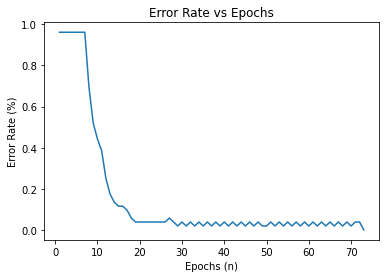

In [28]:
from matplotlib import pyplot as plt # Needed to do matplotlib graphs

# Build the plot of the learning curve via matplotlib.
plt.title("Error Rate vs Epochs")
plt.xlabel("Epochs (n)")
plt.ylabel("Error Rate (%)")
plt.plot(epoch_list, err_list)
plt.show()